# Flight-Price-Prediction

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR

In [15]:
flight_train=pd.read_excel("Data_Train.xlsx")
flight_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [16]:
flight_test=pd.read_excel("Test_set.xlsx")
flight_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [17]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [18]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [19]:
flight_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [20]:
flight_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [21]:
flight_train.shape

(10683, 11)

In [22]:
flight_test.shape

(2671, 10)

In [23]:
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
flight_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [25]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [26]:
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [27]:
flight_train[flight_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [28]:
flight_train['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [29]:
flight_train['Total_Stops'].mode()

0    1 stop
dtype: object

In [30]:
flight_train.loc[9039,'Route']='DEL-> BOM -> COK'
flight_train.loc[9039,'Total_Stop']='1 stop'

In [31]:
flight_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

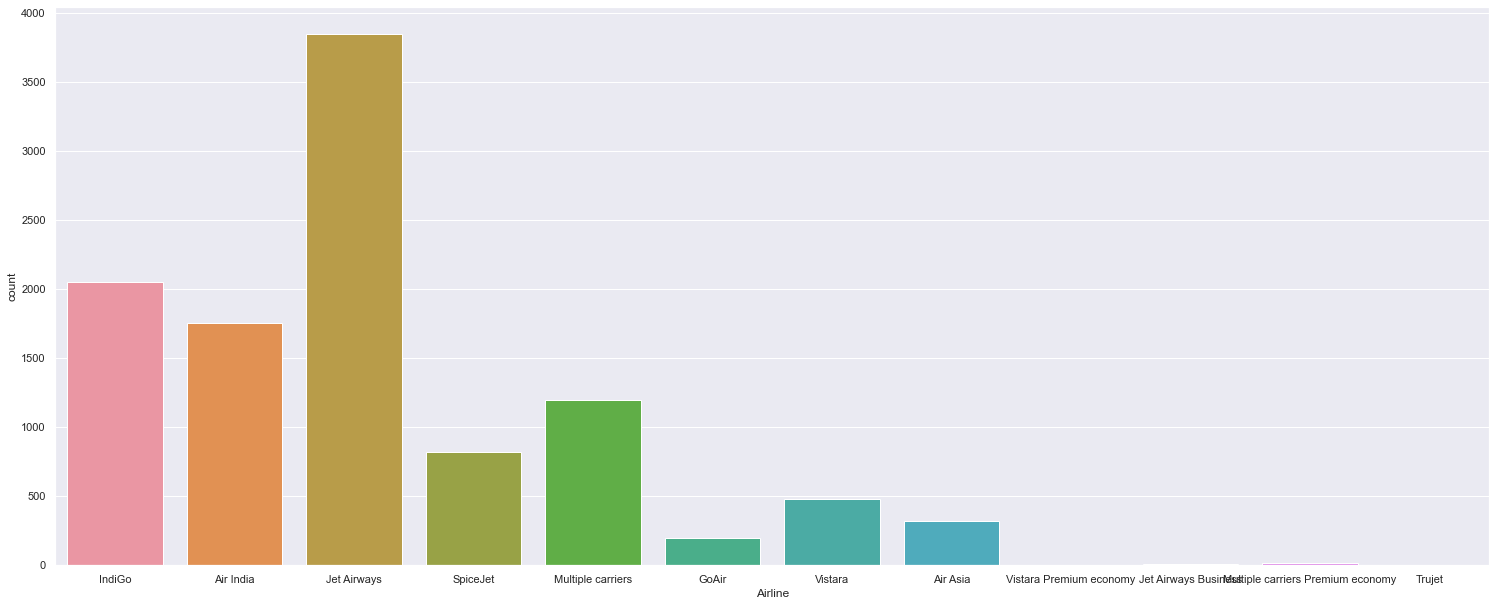

In [32]:
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(flight_train['Airline'])

In [33]:
flight_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
pd.crosstab(flight_train['Source'],flight_train['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4537,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


In [36]:
flight_train.loc[flight_train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Total_Stop                          NaN
Name: 2924, dtype: object

In [37]:
flight_train.loc[flight_train['Price'].idxmin()]

Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Total_Stop                  NaN
Name: 4066, dtype: object

In [38]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [39]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_Stop
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,NaN


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

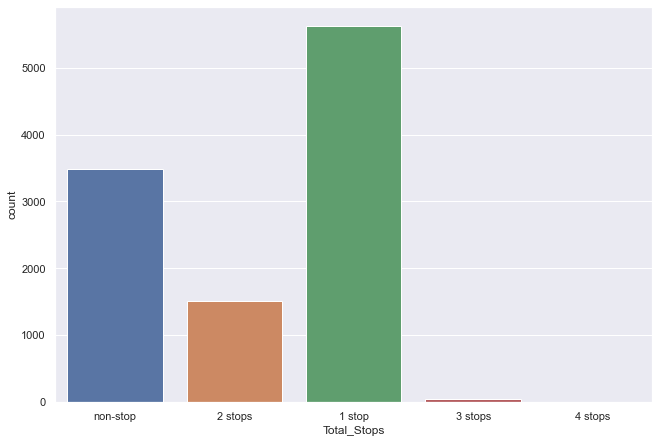

In [40]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(flight_train['Total_Stops'])

In [41]:
pd.crosstab(flight_train['Airline'],flight_train['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,129,9,0,0,181
Air India,540,756,37,1,417
GoAir,102,0,0,0,92
IndiGo,793,19,0,0,1241
Jet Airways,2535,691,0,0,623
Jet Airways Business,4,2,0,0,0
Multiple carriers,1145,43,8,0,0
Multiple carriers Premium economy,13,0,0,0,0
SpiceJet,148,0,0,0,670


In [43]:
flight_train['Date_of_Journey']=pd.to_datetime(flight_train['Date_of_Journey'])
flight_train['Month_of_Journey']=flight_train['Date_of_Journey'].dt.month
flight_train['Day_of_Journey']=flight_train['Date_of_Journey'].dt.day

In [44]:
flight_train['Month_of_Journey'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64

In [45]:
flight_test['Date_of_Journey']=pd.to_datetime(flight_test['Date_of_Journey'])
flight_test['Month_of_Journey']=flight_test['Date_of_Journey'].dt.month
flight_test['Day_of_Journey']=flight_test['Date_of_Journey'].dt.day

In [46]:
flight_train.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Total_Stop                  object
Month_of_Journey             int64
Day_of_Journey               int64
dtype: object

In [47]:
duration = list(flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+ ' 0m'
        elif 'm' in duration[i]:
            duration[i]= '0h {}'.format(duration[i].strip())
            
dur_hours =[]
dur_minutes=[]

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_train['Duration_hours']=dur_hours
flight_train['Duration_minutes']=dur_minutes

ValueError: invalid literal for int() with base 10: '19h0'

In [48]:
duration = list(flight_test['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+ ' 0m'
        elif 'm' in duration[i]:
            duration[i]='0h {}'.format(duration[i].strip())
            
dur_hours =[]
dur_minutes=[]

for i in range(len(duration)):
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_test['Duration_hours']=dur_hours
flight_test['Duration_minutes']=dur_minutes

ValueError: invalid literal for int() with base 10: '0h5'

In [49]:
flight_train = flight_train.drop(labels="Duration", axis=1)

In [50]:
flight_test = flight_test.drop(labels="Duration", axis=1)

In [51]:
flight_train['Dep_Time']= pd.to_datetime(flight_train['Dep_Time'])
flight_train['Arrival_Time']= pd.to_datetime(flight_train['Arrival_Time'])
flight_train['Dep_Time_hours']= flight_train['Dep_Time'].dt.hour
flight_train['Dep_Time_minutes']= flight_train['Dep_Time'].dt.minute
flight_train['Arr_Time_hours']= flight_train['Arrival_Time'].dt.hour
flight_train['Arr_Time_minutes']= flight_train['Arrival_Time'].dt.minute

In [52]:
flight_test['Dep_Time']= pd.to_datetime(flight_test['Dep_Time'])
flight_test['Arrival_Time']= pd.to_datetime(flight_test['Arrival_Time'])
flight_test['Dep_Time_hours']= flight_test['Dep_Time'].dt.hour
flight_test['Dep_Time_minutes']= flight_test['Dep_Time'].dt.minute
flight_test['Arr_Time_hours']= flight_test['Arrival_Time'].dt.hour
flight_test['Arr_Time_minutes']= flight_test['Arrival_Time'].dt.minute

In [53]:
flight_train = flight_train.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [54]:
flight_test = flight_test.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [55]:
flight_train['Price'].groupby(flight_train['Total_Stops']).mean()

Total_Stops
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

In [58]:
flight_train['Date_of_journey_weekname']= flight_train['Date_of_Journey'].dt.weekday_name
flight_train['Is_weekend']=np.where(flight_train['Date_of_journey_weekname'].isin(['Sunday','Saturday']),1,0)

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [59]:
flight_test['Date_of_journey_weekname']= flight_test['Date_of_Journey'].dt.weekday_name
flight_test['Is_weekend']=np.where(flight_test['Date_of_journey_weekname'].isin(['Sunday','Saturday']),1,0)

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [61]:
flight_train = flight_train.drop(labels='Date_of_Journey',axis=1)

In [62]:
flight_test = flight_test.drop(labels='Date_of_Journey',axis=1)

In [63]:
flight_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [64]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [65]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Total_Stop,Month_of_Journey,Day_of_Journey,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,NaN,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,NaN,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,NaN,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,NaN,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,NaN,1,3,16,50,21,35


In [66]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45


In [67]:
flight_train_original = flight_train.copy()

In [68]:
flight_test_original = flight_test.copy()

In [69]:
le1 = LabelEncoder()
le2 = LabelEncoder()

In [70]:
Y_Train = flight_train.iloc[:,6].values

In [71]:
X_Train = flight_train.iloc[:,flight_train.columns!='Price'].values

In [72]:
X_Train.shape

(10683, 13)

In [77]:
X_Train[:,0] = le1.fit_transform(X_Train[:,0])
X_Train[:,1] = le1.fit_transform(X_Train[:,1])
X_Train[:,2] = le1.fit_transform(X_Train[:,2])
X_Train[:,3] = le1.fit_transform(X_Train[:,3])
X_Train[:,4] = le1.fit_transform(X_Train[:,4])
X_Train[:,5] = le1.fit_transform(X_Train[:,5])
X_Train[:,12] = le1.fit_transform(X_Train[:,12])

In [80]:
X_Test[:,0] = flight_test.iloc[:,:].values

NameError: name 'X_Test' is not defined

In [83]:
X_Test = flight_test.iloc[:,:].values
X_Test[:,0] = le2.fit_transform(X_Test[:,0])
X_Test[:,1] = le2.fit_transform(X_Test[:,1])
X_Test[:,2] = le2.fit_transform(X_Test[:,2])
X_Test[:,3] = le2.fit_transform(X_Test[:,3])
X_Test[:,4] = le2.fit_transform(X_Test[:,4])
X_Test[:,5] = le2.fit_transform(X_Test[:,5])
X_Test[:,11] = le2.fit_transform(X_Test[:,11])

In [84]:
pd.DataFrame(X_Test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,4,2,1,76,0,5,6,6,17,30,4,5
1,3,3,0,65,0,5,12,5,6,20,10,4
2,4,2,1,76,0,3,5,21,19,15,19,0
3,6,2,1,76,0,5,5,21,8,0,21,0
4,0,0,2,16,4,5,6,24,23,55,2,9


In [85]:
sc = StandardScaler()

In [88]:
X_Train = sc.fit_transform(X_Train)

ValueError: could not convert string to float: '1 stop'

In [89]:
X_Test = sc.transform(X_Test)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [90]:
Y_Train = Y_Train.reshape((len(Y_Train)),1)

In [91]:
Y_Train = sc.fit_transform(Y_Train)

In [92]:
Y_Train = Y_Train.ravel()

In [94]:
pd.DataFrame(X_Train).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3,0,5,18,4,8,NaN,3,24,22,20,1,2
1,1,3,0,84,1,8,NaN,1,5,5,50,13,3
2,4,2,1,118,1,8,NaN,9,6,9,25,4,5
3,3,3,0,91,0,8,NaN,12,5,18,5,23,6
4,3,0,5,29,0,8,NaN,1,3,16,50,21,7
5,8,3,0,64,4,8,NaN,6,24,9,0,11,5
6,4,0,5,5,0,5,NaN,12,3,18,55,10,5
7,4,0,5,5,0,8,NaN,1,3,8,0,5,1
8,4,0,5,5,0,5,NaN,12,3,8,55,10,5
9,6,2,1,104,0,8,NaN,5,27,11,25,19,3


In [96]:
pd.DataFrame(Y_Train).head()

,0
0,-1.125548
1,-0.309048
2,1.039858
3,-0.622202
4,0.914076


randm forest regression

In [97]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [98]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [99]:
rf =RandomForestRegressor()